<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-ZTM/blob/main/TF_ZTM_03_Comuter_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Convolutional Neural Network and Computer Vision with TensorFlow

## Get the Data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-05-13 18:03:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   132MB/s    in 0.8s    

2023-05-13 18:03:44 (132 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
#Unzip the Downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")

In [3]:
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak

test  train


In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


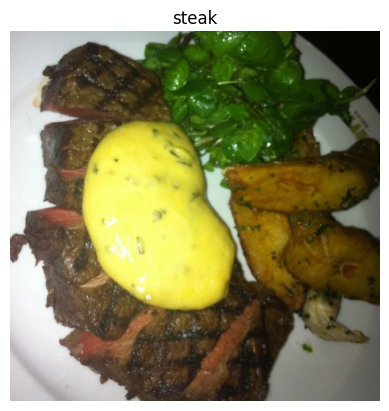

In [9]:


# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# View the img (actually just a big array/tensor)
img

array([[[186, 186, 188],
        [186, 186, 188],
        [187, 187, 189],
        ...,
        [  2,   4,   1],
        [  2,   4,   1],
        [  2,   4,   1]],

       [[187, 187, 189],
        [187, 187, 189],
        [188, 188, 190],
        ...,
        [  2,   4,   1],
        [  2,   4,   1],
        [  2,   4,   1]],

       [[188, 188, 190],
        [188, 188, 190],
        [189, 189, 191],
        ...,
        [  2,   4,   1],
        [  2,   4,   1],
        [  2,   4,   1]],

       ...,

       [[195, 190, 187],
        [196, 191, 188],
        [196, 191, 188],
        ...,
        [ 91,  89,  90],
        [ 90,  88,  89],
        [ 89,  87,  90]],

       [[195, 190, 187],
        [195, 190, 187],
        [196, 191, 188],
        ...,
        [ 90,  88,  89],
        [ 89,  87,  88],
        [ 88,  86,  89]],

       [[195, 190, 187],
        [196, 191, 188],
        [197, 192, 189],
        ...,
        [ 90,  88,  89],
        [ 88,  86,  87],
        [ 86,  84,  87]]

In [11]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.72941176, 0.72941176, 0.7372549 ],
        [0.72941176, 0.72941176, 0.7372549 ],
        [0.73333333, 0.73333333, 0.74117647],
        ...,
        [0.00784314, 0.01568627, 0.00392157],
        [0.00784314, 0.01568627, 0.00392157],
        [0.00784314, 0.01568627, 0.00392157]],

       [[0.73333333, 0.73333333, 0.74117647],
        [0.73333333, 0.73333333, 0.74117647],
        [0.7372549 , 0.7372549 , 0.74509804],
        ...,
        [0.00784314, 0.01568627, 0.00392157],
        [0.00784314, 0.01568627, 0.00392157],
        [0.00784314, 0.01568627, 0.00392157]],

       [[0.7372549 , 0.7372549 , 0.74509804],
        [0.7372549 , 0.7372549 , 0.74509804],
        [0.74117647, 0.74117647, 0.74901961],
        ...,
        [0.00784314, 0.01568627, 0.00392157],
        [0.00784314, 0.01568627, 0.00392157],
        [0.00784314, 0.01568627, 0.00392157]],

       ...,

       [[0.76470588, 0.74509804, 0.73333333],
        [0.76862745, 0.74901961, 0.7372549 ],
        [0.76862745, 0

## An end to end example
Let's build an End to end Neural Network
* Load our images
* preprocess
* Build CNN to find patterns
* Compile the CNN
* Fit the CNN

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (Get all the pixel values to be between 0 &1, also called normalization)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

#import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
model_1= tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 29s 284ms/step - loss: 0.6195 - accuracy: 0.6627 - val_loss: 0.5369 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 12s 265ms/step - loss: 0.4599 - accuracy: 0.7920 - val_loss: 0.3665 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 12s 265ms/step - loss: 0.4132 - accuracy: 0.8353 - val_loss: 0.3435 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.3458 - accuracy: 0.8633 - val_loss: 0.3306 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.2952 - accuracy: 0.8767 - val_loss: 0.3016 - val_accuracy: 0.8740


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
#Using the sae model as before with the different dataset

In [16]:
tf.random.set_seed(42)

#Create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 213ms/step - loss: 0.6987 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 255ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 256ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [19]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 4)                 602116    
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [21]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)) 

Epoch 1/5
47/47 [==============================] - 12s 220ms/step - loss: 2.5071 - accuracy: 0.6200 - val_loss: 0.6241 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 12s 249ms/step - loss: 0.8768 - accuracy: 0.6967 - val_loss: 0.5072 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.7687 - accuracy: 0.7200 - val_loss: 0.6724 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6406 - accuracy: 0.7447 - val_loss: 0.5601 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.7808 - accuracy: 0.7180 - val_loss: 0.4791 - val_accuracy: 0.7860


In [22]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 100)               15052900  
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________
